# M10 --- Python Data Stories
#### Group members:  Zhihong Zhang


## Introduction 
In this practical challenge, I am going to work on the dataset and using some visualization tool for showing the different data stories. 


For the steps I will use in this challenge, Exploratory data analysis(EDA) will be launched firstly, and based on the EDA, I will picked suitable features to create varities of data stories.

The packages I will use are mainly seaborn,matplot and pandas. 





##  Exploratory Data Analysis

The first thing of the task is to load the data set and check the rough view of these attributes. I got this African Economic data from Kaggle. https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [2]:


# check and read the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/M10/african_crises.csv')

df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


Then the code was run to check the overview of the whole data set. And it is clear that there are 1059 rows of data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

Also, we can tell there are no null values across whole dataset. 

In [4]:
#check null value 
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

This data frame have 1462 rows and 5 variables. 



Most variables are very straightforward and we knew what it means just through the column name. Also, since there is no missing value, we do not need to worry about the dealing time series mssing value.
 


In [5]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


## Visualization

Here I chose these 4 visualizations for the data stories. 

###  Change over time

I firstly plot change over time for all countries in Africa

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

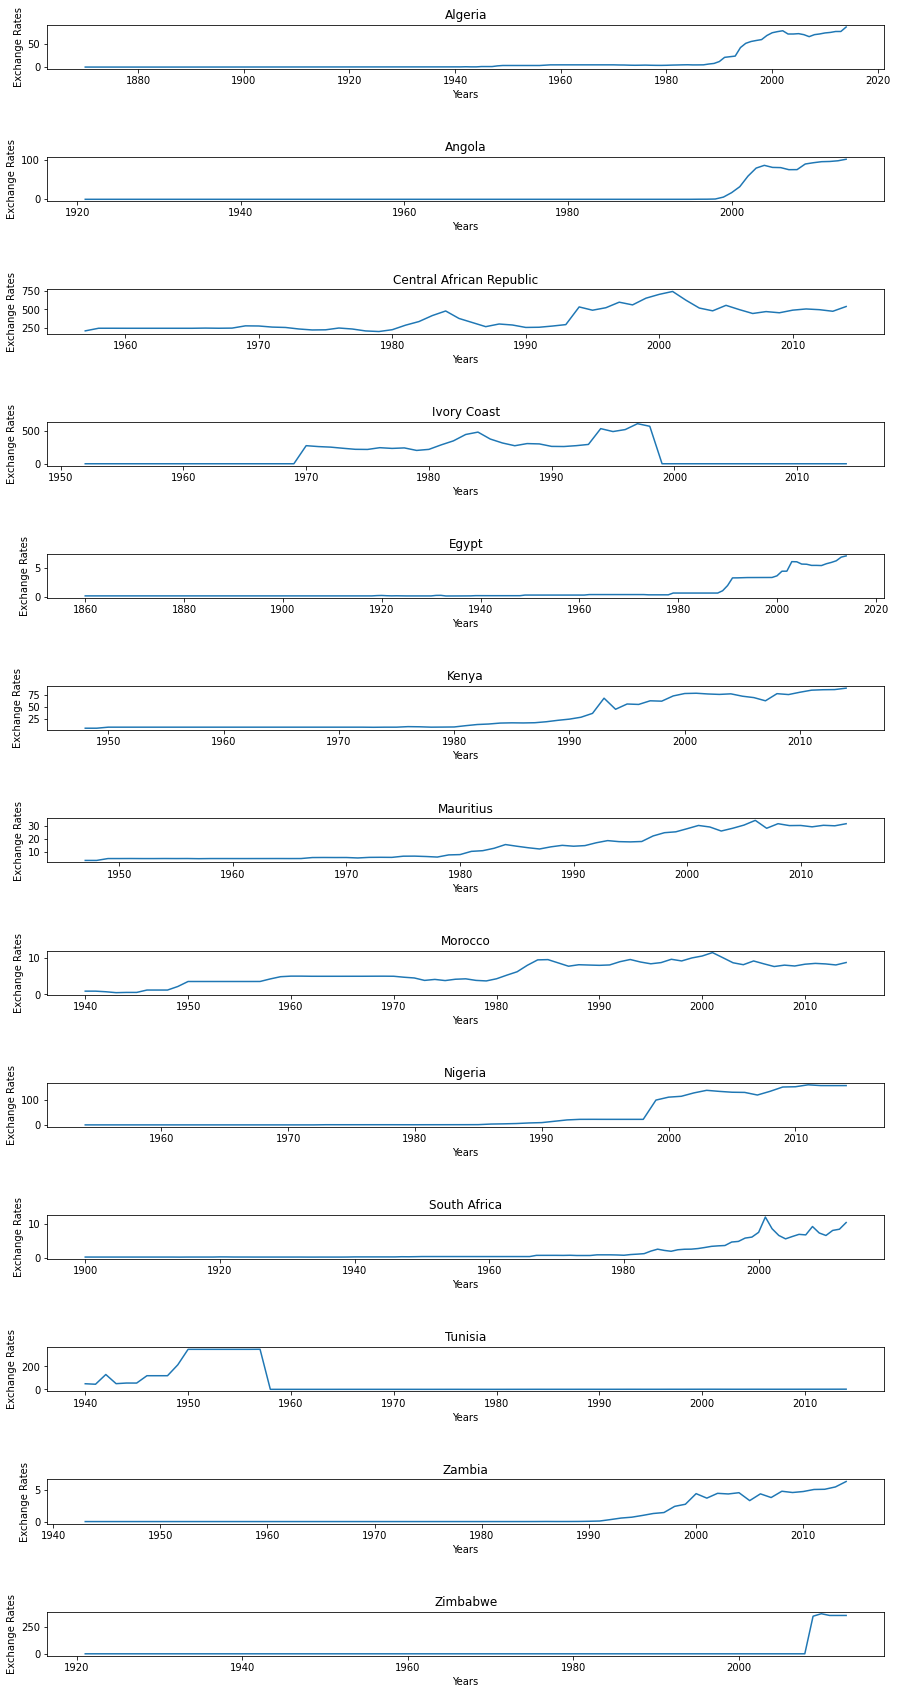

In [6]:
plt.figure(figsize=(15,30))
count = 1
for country in df.country.unique():
    plt.subplot(len(df.country.unique()),1,count)
    count+=1
    sns.lineplot(df[df.country==country]['year'],df[df.country==country]['exch_usd'])
    plt.subplots_adjust(hspace=2)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

Now we plot all exchange Rates of the countries in the dataset. However, it is hard to compare them all. 

To have a better clarity, I then plot the graph on the same graph. This time I only compares three countries which are Egypt, Nigeria and Kenya over the time on Exchange Rates.

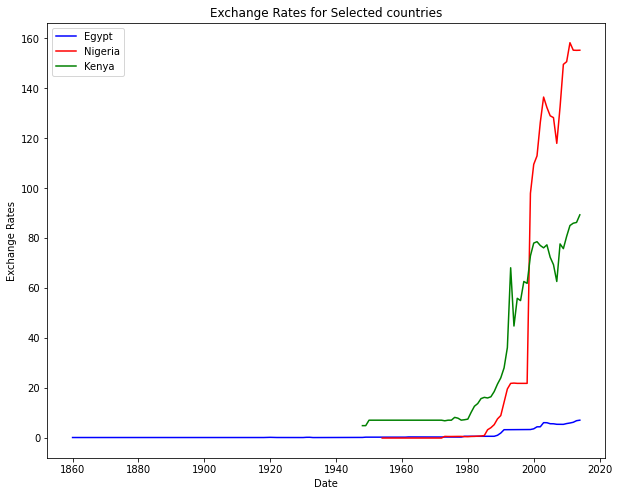

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(df[df.country=="Egypt"]['year'], df[df.country=="Egypt"]['exch_usd'], 'b-', label = 'Egypt')
plt.plot(df[df.country=="Nigeria"]['year'], df[df.country=="Nigeria"]['exch_usd'], 'r-', label = 'Nigeria')
plt.plot(df[df.country=="Kenya"]['year'], df[df.country=="Kenya"]['exch_usd'], 'g-', label = 'Kenya')
plt.xlabel('Date'); plt.ylabel('Exchange Rates'); plt.title('Exchange Rates for Selected countries')
plt.legend();

When we compare three countries together, it is clear to see Nigeria skyrocket in Exchange Rayte around 90s and quickly be over the Kenya. 

### Drill Down

I firstly compare the bankrupt cases for these countries 

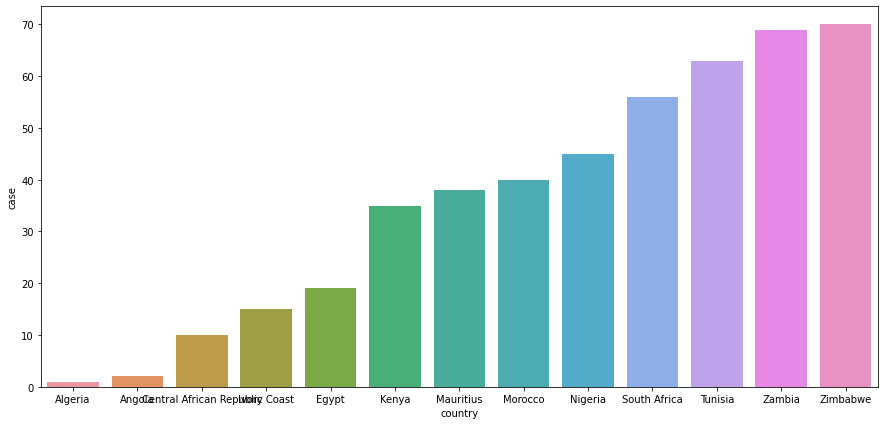

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='country', y='case')
plt.show()

Then I drill down since I know something happen in 90s. 


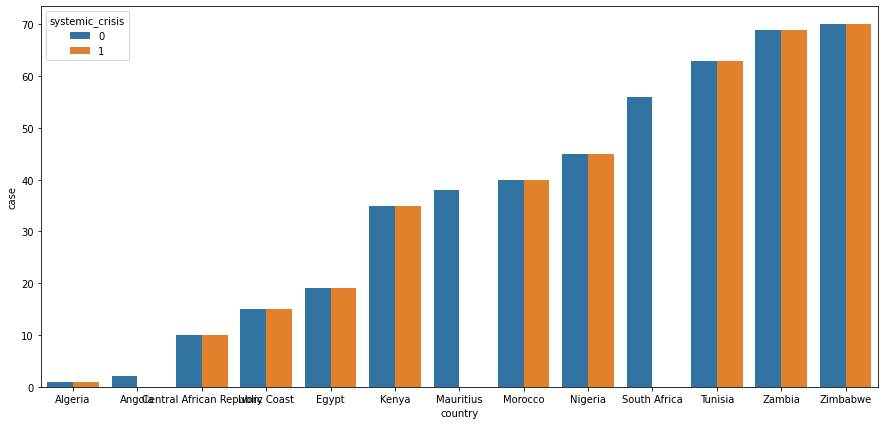

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='country', y='case',hue="systemic_crisis")
plt.show()

We can see most of the countries in these data sert has systemic crisis. Even Mauritius and South which donot have systemic crisis stilkl have a high cases. We may consider there will be some reasons beyond this systemic crisis factors. 

In [16]:
import plotly

### Intersection

For the intersection, we reuse previous visualization and fix a bit.

(1900.0, 1980.0)

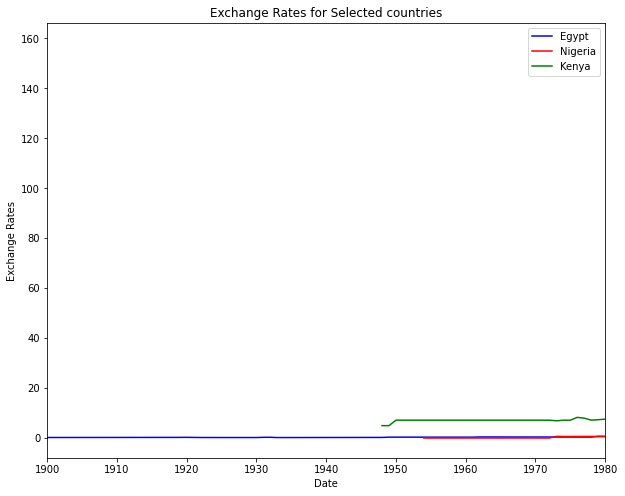

In [57]:

plt.figure(figsize=(10, 8))
plt.plot(df[df.country=="Egypt"]['year'], df[df.country=="Egypt"]['exch_usd'], 'b-', label = 'Egypt')
plt.plot(df[df.country=="Nigeria"]['year'], df[df.country=="Nigeria"]['exch_usd'], 'r-', label = 'Nigeria')
plt.plot(df[df.country=="Kenya"]['year'], df[df.country=="Kenya"]['exch_usd'], 'g-', label = 'Kenya')
plt.xlabel('Date'); plt.ylabel('Exchange Rates'); plt.title('Exchange Rates for Selected countries')
plt.legend();
plt.xlim(1900, 1980)


We see even before 1980, the curve is quite smooth

(1980.0, 2020.0)

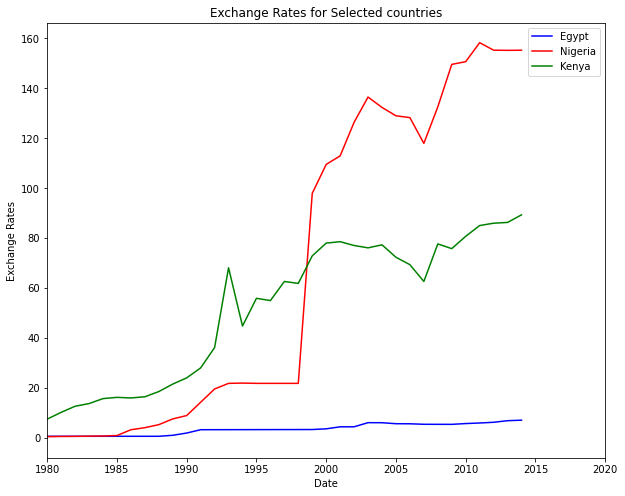

In [58]:

plt.figure(figsize=(10, 8))
plt.plot(df[df.country=="Egypt"]['year'], df[df.country=="Egypt"]['exch_usd'], 'b-', label = 'Egypt')
plt.plot(df[df.country=="Nigeria"]['year'], df[df.country=="Nigeria"]['exch_usd'], 'r-', label = 'Nigeria')
plt.plot(df[df.country=="Kenya"]['year'], df[df.country=="Kenya"]['exch_usd'], 'g-', label = 'Kenya')
plt.xlabel('Date'); plt.ylabel('Exchange Rates'); plt.title('Exchange Rates for Selected countries')
plt.legend();
plt.xlim(1980, 2020)

We continue further, we can clearly see the change start around 1985. The tool helps us to get more information of the graph. 

### Outlier

Here OI just plot the general curve of the Exchange Rates.

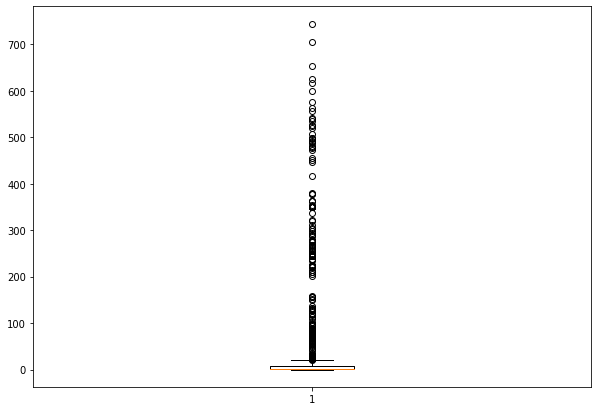

In [49]:
np.random.seed(10) 

fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(df.exch_usd) 
  
# show plot 
plt.show() 

Boxplot clearly detected these outlier of the dataset, for these African countries, the rate which are higher than 89 are generally outliers. 

## Conclusion

Based on the these results, visualization is the powerful tool to help us to better understand the nature of the data. 

## References

1. Boxplot
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

